In [ ]:
'''!pip install numpy
!pip install plotly
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install statsmodels
!pip install yellowbrick
!pip install imblearn
!pip install xgboost
!pip install graphviz'''

'!pip install numpy\n!pip install plotly\n!pip install pandas\n!pip install matplotlib\n!pip install seaborn\n!pip install sklearn\n!pip install statsmodels\n!pip install yellowbrick\n!pip install imblearn\n!pip install xgboost\n!pip install graphviz'

In [ ]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read and Load Dataset


yelp_data = pd.read_csv('/content/combined_reviews_businesses.zip', sep=',', header=0)

In [ ]:
yelp_data.head()

,review_id,user_id,business_id,stars_x,text,date,name,city,state,stars_y,review_count,categories
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,North Wales,PA,3.0,169,"Restaurants, Breakfast & Brunch, Food, Juice B..."
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,Tucson,AZ,3.5,47,"Restaurants, Breakfast & Brunch"
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,Philadelphia,PA,4.0,181,"Halal, Pakistani, Restaurants, Indian"
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,New Orleans,LA,4.0,32,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,Dmitri's,Philadelphia,PA,4.0,273,"Mediterranean, Restaurants, Seafood, Greek"


In [ ]:
yelp_data = yelp_data.rename(columns={"stars_y": "float_stars", "stars_x": "stars"})
yelp_data = yelp_data.drop(['user_id'], axis=1)
yelp_data.head()

,review_id,business_id,stars,text,date,name,city,state,float_stars,review_count,categories
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,North Wales,PA,3.0,169,"Restaurants, Breakfast & Brunch, Food, Juice B..."
1,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,Tucson,AZ,3.5,47,"Restaurants, Breakfast & Brunch"
2,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,Philadelphia,PA,4.0,181,"Halal, Pakistani, Restaurants, Indian"
3,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,New Orleans,LA,4.0,32,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
4,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,Dmitri's,Philadelphia,PA,4.0,273,"Mediterranean, Restaurants, Seafood, Greek"


In [ ]:
yelp_data.dtypes

,0
review_id,object
business_id,object
stars,int64
text,object
date,object
name,object
city,object
state,object
float_stars,float64
review_count,int64


In [ ]:
yelp_data.describe()

,stars,float_stars,review_count
count,4.724684e+06,4.724684e+06,4.724684e+06
mean,3.793792e+00,3.792524e+00,4.925586e+02
std,1.391234e+00,6.258253e-01,8.501876e+02
min,1.000000e+00,1.000000e+00,5.000000e+00
25%,3.000000e+00,3.500000e+00,9.000000e+01
50%,4.000000e+00,4.000000e+00,2.210000e+02
75%,5.000000e+00,4.000000e+00,5.080000e+02
max,5.000000e+00,5.000000e+00,7.568000e+03


In [ ]:
yelp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724684 entries, 0 to 4724683
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   review_id     object 
 1   business_id   object 
 2   stars         int64  
 3   text          object 
 4   date          object 
 5   name          object 
 6   city          object 
 7   state         object 
 8   float_stars   float64
 9   review_count  int64  
 10  categories    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 396.5+ MB


In [ ]:
yelp_data.isnull().sum()

,0
review_id,0
business_id,0
stars,0
text,0
date,0
name,0
city,0
state,0
float_stars,0
review_count,0


In [ ]:
yelp_data.shape

(4724684, 11)

In [ ]:
sns.countplot(x='stars', data=yelp_data)
plt.title('Distribution of Yelp Star Ratings')
plt.show()


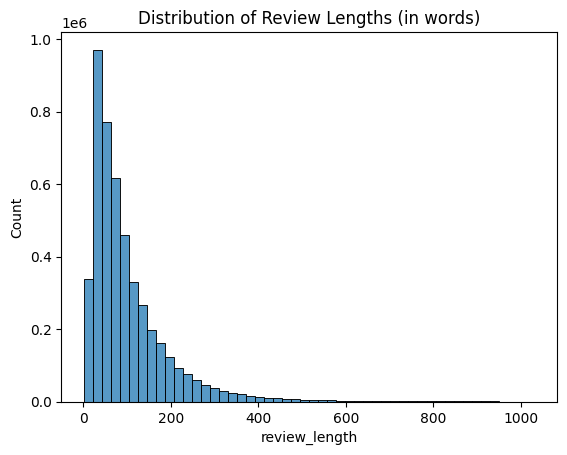

In [ ]:
yelp_data['review_length'] = yelp_data['text'].apply(lambda x: len(x.split()))
sns.histplot(yelp_data['review_length'], bins=50)
plt.title('Distribution of Review Lengths (in words)')
plt.show()


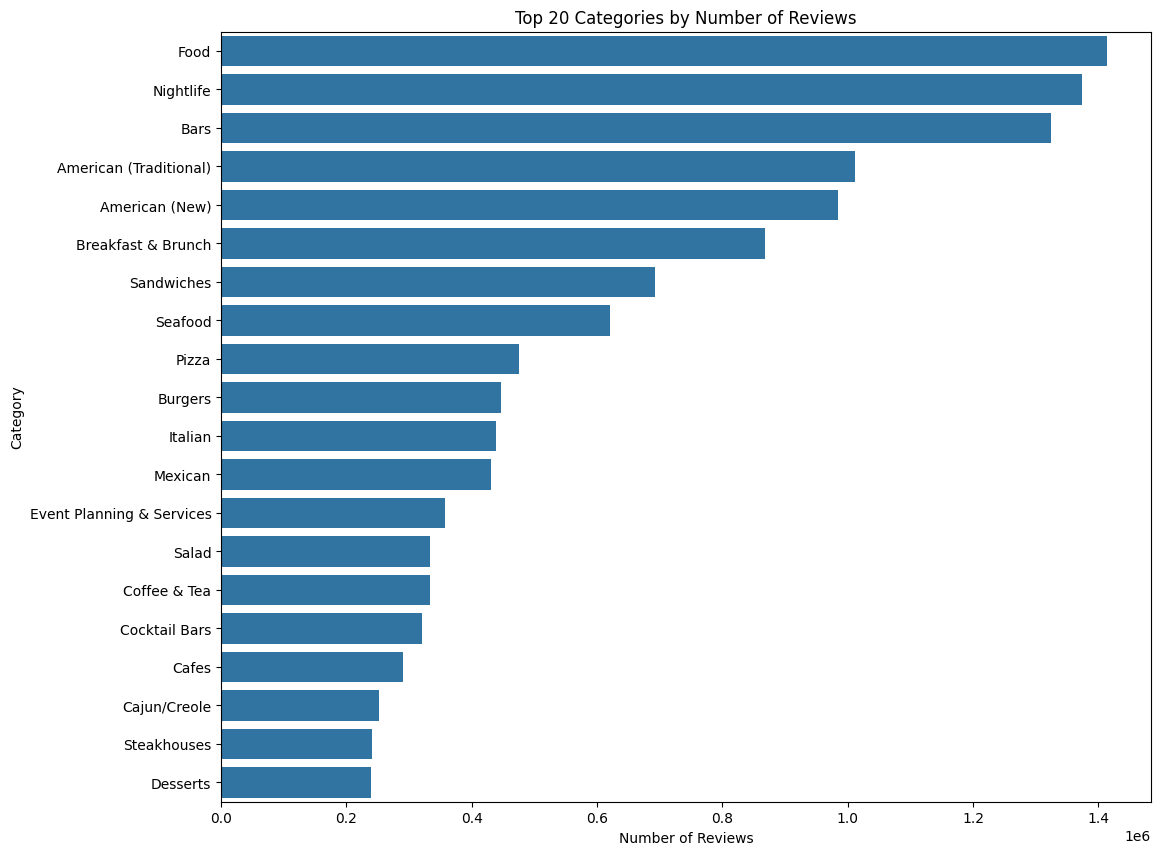

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split the 'categories' column to flatten the list of categories into individual rows

# Explode the 'categories' column into separate rows
yelp_data['categories_list'] = yelp_data['categories'].str.split(', ')
yelp_reviews_exploded = yelp_data.explode('categories_list')

filtered_categories = yelp_reviews_exploded[~yelp_reviews_exploded['categories_list'].str.contains('Restaurant', case=False, na=False)]


# Count the number of reviews associated with each category
category_review_counts = filtered_categories.groupby('categories_list')['review_id'].count().reset_index()
category_review_counts.columns = ['Category', 'Number of Reviews']

# Visualize the top 20 categories by number of reviews
plt.figure(figsize=(12, 10))
sns.barplot(y='Category', x='Number of Reviews', data=category_review_counts.sort_values(by='Number of Reviews', ascending=False).head(20))
plt.title('Top 20 Categories by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Category')
plt.show()
